In [2]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import seaborn as sns 

import statsmodels.api as sm
sns.set()


import charles
import general_code
import marie

%load_ext autoreload
%autoreload 2

# Loading the data

In [3]:
import run_reproduction

In [4]:
file = "../Data/result_full_factorial_pgm.csv"

In [5]:
data = run_reproduction.Data_prep_replication(file)

In [6]:
weights = run_reproduction.weights_obtain(data)

In [7]:
results = run_reproduction.regression_results(data)

In [8]:
results.head()

Median of the Massdistribution in kDa  \
                                          
0                                  31.9   
1                                  31.9   
2                                  31.9   
3                                  31.9   
4                                  31.9   

  Sigma parameter of the Massdistribution Volume fraction Rate constant  \
                                                                          
0                                   0.825             0.0        k1_bwd   
1                                   0.825             0.0        k1_fwd   
2                                   0.825             0.0        k2_bwd   
3                                   0.825             0.0        k2_fwd   
4                                   0.825             0.1        k1_bwd   

       beta                               alpha E                ...       \
   Estimate     0.025     0.975 p-value  Estimate     0.025      ...        
0 -0.014756 -0.014822 -0.014691     0.0 -0.000190 -0.000317      ...        
1  0.073132  0.070293  0.075971     0.0  0.010658  0.003545      ...        
2  0.068795  0.065675  0.071915     0.0  0.000481 -0.005600      ...        
3 -0.014756 -0.014821 -0.014690     0.0 -0.000190 -0.000317      ...        
4 -0.117351 -0.117510 -0.117192     0.0  0.001708  0.001396      ...        

   alpha ES                  alpha P                                    \
      0.975        p-value  Estimate     0.025     0.975       p-value   
0  0.000109   7.713487e-01 -0.002936 -0.002976 -0.002896  0.000000e+00   
1  0.011204   8.019231e-02  0.000256 -0.001460  0.001971  7.701728e-01   
2  0.006852   7.308795e-01  0.006592  0.004601  0.008584  9.199772e-11   
3  0.000108   7.688221e-01 -0.002936 -0.002976 -0.002896  0.000000e+00   
4  0.003771  5.107549e-100 -0.003575 -0.003673 -0.003478  0.000000e+00   

    alpha S                                    
   Estimate     0.025     0.975       p-value  
0 -0.002936 -0.002976 -0.002896  0.000000e+00  
1  0.004736  0.002871  0.006600  6.552938e-07  
2 -0.000230 -0.002004  0.001545  7.996240e-01  
3 -0.002936 -0.002976 -0.002896  0.000000e+00  
4 -0.003564 -0.003661 -0.003468  0.000000e+00  

[5 rows x 24 columns]

In [9]:
X = data.loc[:, data.columns != '']
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=0, test_size=0.4)
print(X_train.shape, X_test.shape)

NameError: name 'y1' is not defined

In [ ]:
marie.regression_results(data)

In [ ]:
#we look for a crowding condition of 10%
test = data[(data['volume_fraction']==0.1)]

test = test[(test['sigma_mass'] == 0.825)]
test = test[(test['mu_mass']== 31.9)]
Weights = charles.weights_obtain(test)

In [ ]:
Weights.head()

## Notation

y1 = log_k1_bwd

y2 = log_k1_fwd

y3 = log_k2_bwd

y4 = log_k2_fwd

In [ ]:
# build the model matrix
X = test[['E','ES','P','S']]
X = sm.add_constant(X)

In [ ]:
X.head()

In [ ]:
model_y1 = sm.WLS(test['log_k1_bwd'],X, weights=Weights.log_k1_bwd).fit()
model_y2 = sm.WLS(test['log_k1_fwd'],X, weights=Weights.log_k1_fwd).fit()
model_y3 = sm.WLS(test['log_k2_bwd'],X, weights=Weights.log_k2_bwd).fit()
model_y4 = sm.WLS(test['log_k2_fwd'],X, weights=Weights.log_k2_fwd).fit()

In [ ]:
print(model_y1.summary())

In [ ]:
print(model_y1.params)

In [10]:
file_results = '../results/reproduction.csv'

In [11]:
results = pd.read_csv(file_results)

In [12]:
results

,Unnamed: 0,Median of the Massdistribution in kDa,Sigma parameter of the Massdistribution,Volume fraction,Rate constant,beta,beta.1,beta.2,beta.3,alpha E,...,alpha ES.2,alpha ES.3,alpha P,alpha P.1,alpha P.2,alpha P.3,alpha S,alpha S.1,alpha S.2,alpha S.3
0,NaN,NaN,NaN,NaN,NaN,Estimate,0.025000,0.975000,p-value,Estimate,...,0.975000,p-value,Estimate,0.025000,0.975000,p-value,Estimate,0.025000,0.975000,p-value
1,0.0,31.9,0.825,0.0,k1_bwd,-0.014756171210216714,-0.014822,-0.014691,0.0,-0.00018996584195793604,...,0.000109,0.7713486948317397,-0.0029360902263253575,-0.002976,-0.002896,0.0,-0.002936232106218257,-0.002976,-0.002896,0.0
2,1.0,31.9,0.825,0.0,k1_fwd,0.07313186029193425,0.070293,0.075971,0.0,0.010657803520008065,...,0.011204,0.08019231414507644,0.00025562547653320324,-0.001460,0.001971,0.7701728035814398,0.004735628026615096,0.002871,0.006600,6.552938255951277e-07
3,2.0,31.9,0.825,0.0,k2_bwd,0.06879489446747342,0.065675,0.071915,0.0,0.0004810697173589064,...,0.006852,0.7308794937759122,0.0065921456310595854,0.004601,0.008584,9.199771858057634e-11,-0.0002297661099860549,-0.002004,0.001545,0.7996239828674113
4,3.0,31.9,0.825,0.0,k2_fwd,-0.01475573622233773,-0.014821,-0.014690,0.0,-0.00018984095668022667,...,0.000108,0.7688220863238069,-0.002936230419786162,-0.002976,-0.002896,0.0,-0.0029363680354143815,-0.002976,-0.002896,0.0
5,4.0,31.9,0.825,0.1,k1_bwd,-0.11735067173974212,-0.117510,-0.117192,0.0,0.0017081193975881557,...,0.003771,5.107549049430483e-100,-0.0035750086778206665,-0.003673,-0.003478,0.0,-0.0035643976661084947,-0.003661,-0.003468,0.0
6,5.0,31.9,0.825,0.1,k1_fwd,0.26138249105802336,0.257743,0.265022,0.0,0.01979283936881296,...,0.021410,0.001022241315751523,0.0025114206446139094,0.000159,0.004863,0.03637076265872756,-0.0001133873226313053,-0.002435,0.002208,0.9237206003240055
7,6.0,31.9,0.825,0.1,k2_bwd,0.2543764245835605,0.250997,0.257756,0.0,0.0039282311125042775,...,0.003179,0.3585310487114792,0.0027550521965083656,0.000699,0.004811,0.008628375557121233,0.00011628674659887599,-0.001807,0.002039,0.9056472204117453
8,7.0,31.9,0.825,0.1,k2_fwd,-0.11734724715020078,-0.117506,-0.117188,0.0,0.0017108612667562154,...,0.003774,3.6901506070610307e-100,-0.003575233185435539,-0.003673,-0.003478,0.0,-0.0035643954943902286,-0.003661,-0.003468,0.0
9,8.0,31.9,0.825,0.2,k1_bwd,-0.2803085488761447,-0.280574,-0.280043,0.0,0.0006472950673686662,...,0.000341,0.5018659956694662,-0.004523846203125894,-0.004685,-0.004363,0.0,-0.0045257456250006566,-0.004686,-0.004365,0.0


we want to plot the evolution of the different coefficients wrt to the evolution of the volume fraction 

In [32]:
results['Median of the Massdistribution in kDa'].unique()

array([ nan, 31.9, 12.1, 21.1, 36.8])

In [36]:
data_of_interest = results[(results['Rate constant']== 'k1_bwd') & (results['Median of the Massdistribution in kDa'] < 21)]

intercept_k1_bwd = data_of_interest.beta.values.astype(np.float)
alpha_E_k1_bwd = data_of_interest['alpha E'].values.astype(np.float)
alpha_E_k1_bwd_below = data_of_interest['alpha E.1'].values.astype(np.float)
alpha_E_k1_bwd_above = data_of_interest['alpha E.2'].values.astype(np.float)

alpha_ES_k1_bwd = data_of_interest['alpha ES'].values.astype(np.float)
alpha_P_k1_bwd = data_of_interest['alpha P'].values.astype(np.float)
alpha_S_k1_bwd = data_of_interest['alpha S'].values.astype(np.float)
volume_frac = data_of_interest['Volume fraction'].values.astype(np.float)

Text(0.5,1,'for k1_bwd')

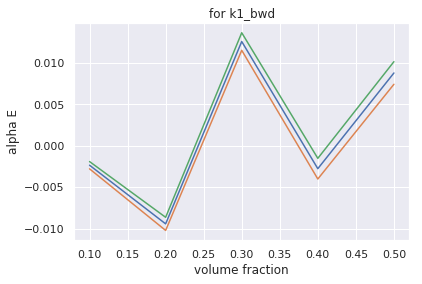

In [40]:
plt.plot(volume_frac,alpha_E_k1_bwd)
plt.plot(volume_frac,alpha_E_k1_bwd_below)
plt.plot(volume_frac,alpha_E_k1_bwd_above)
plt.xlabel("volume fraction")
plt.ylabel("alpha E")
plt.title("for k1_bwd")

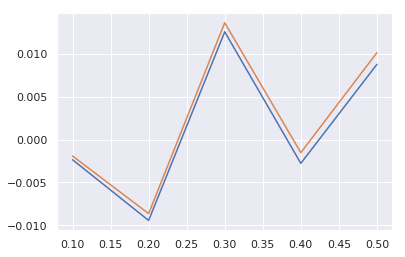

In [39]:
ax = sns.lineplot(volume_frac,alpha_E_k1_bwd)
ax = sns.lineplot(volume_frac, alpha_E_k1_bwd_above)

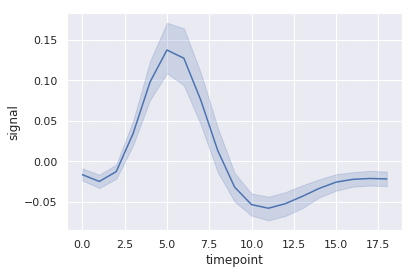

In [26]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)


#  <span style="color:red"> *Garbage, don't look* </span>.

# From the paper, theory

Linear regression to estimate $\beta$ and $\alpha_j$ in the following model:

\begin{equation*}
log(\frac{k_j}{k_{j,0}}) = \beta_j + \alpha_{E,j}log(\frac{[E]}{[E]_0}) + \alpha_{ES,j}log(\frac{[ES]}{[ES]_0})  + \alpha_{P,j}log(\frac{[P]}{[P]_0})  + \alpha_{S,j}log(\frac{[S]}{[S]_0}) 
\end{equation*}

where $j\in [1_{bwd}, 1_{fwd}, 2_{bwd}, 2_{fwd}]$,

$k$ is the effective rate constant, and $k_0$ is the relative rate constant


basically the log ration of the concentration only depends on the volume fraction, the sigma mass and the mu mass: we don't need the covariate [E], [S], [ES], [P] and we can predict exactly the results

form the code of the paper

In [65]:
X = data[['E','ES','P','S']]
Y = data.log_k1_bwd

X = sm.add_constant(X)

In [83]:
model = LinearRegression()
model.fit(X,Y)
res = (Y-model.predict(X)).values

In [107]:
model2 = sm.OLS(X,Y).fit()
res2 = sm.OLS(X,Y).fit().resid

In [108]:
res2

,const,E,ES,P,S
0,0.625227,-1.539378,0.657949,0.690132,-0.002723
1,0.624011,0.658074,-1.539047,1.095588,1.606706
2,0.873336,0.360151,-0.487112,-1.099633,-0.694067
3,-0.295485,0.712180,-0.673758,1.375873,-1.395706
4,0.616048,0.659562,-1.537557,-0.003089,1.095823
5,-0.345147,0.839247,-1.357608,-1.397115,-0.702920
6,0.621572,-0.152401,0.253169,-0.003044,0.690398
7,-0.053810,-0.719293,0.667292,-1.617915,-0.700803
8,0.621997,0.540667,-0.845523,1.606397,0.690401
9,0.396753,0.112770,0.112936,-1.391147,-0.697530


In [105]:
import numpy as np
import statsmodels.api as sm
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
ols_resid = sm.OLS(data.endog, data.exog).fit().resid
res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()
rho = res_fit.params

In [106]:
ols_resid

array([ 267.34002979,  -94.01394237,   46.28716779, -410.1146219 ,
        309.71459079, -249.3112153 , -164.04895636,  -13.18035684,
         14.30477263,  455.39409458,  -17.26892708,  -39.05504249,
       -155.54997356,  -85.67130801,  341.93151399, -206.75782516])

# Computation of the residuals   

### note

We have to do this for each "group" define by a combination of values of `sigma_mass`, `mu_mass` and `volume_occupation`

following the paper process we compute regression like the following one : 


`log_k_j` = $\beta + \alpha_1$ `E` + $r_E$

and then compute an estimate of the variance: 

$\sqrt{\frac{RSS}{n-2}}$  where RSS = $|| r_E||_2^2$

In [16]:
#create dataframe to do the regression
def create_regressors(data_test,name):
    x = data_test[name].values
    X = np.c_[np.ones(len(x)), x]
    return X

In [17]:
#do the regression and return the model fitted
def regression(X,y):
    reg = LinearRegression()
    reg.fit(X,y)
    
    y_hat = reg.predict(X)
    coeffs = reg.coef_
    residuals = (y-y_hat).values
    return coeffs,y_hat,residuals

In [18]:
mus = data.mu_mass.unique()
sigmas = data.sigma_mass.unique()
volumes = [0.1,0.2,0.3,0.4,0.5]

names = ["E","ES","P","S"]

In [19]:
def Regressors(data):
    '''
    return a vector containing the design matrix for the regression of the log efficient rate ratio against 
    E,ES,P,S in that order
    '''
    X_total = []
    for name in names:
        X_total.append(create_regressors(data,name))
    return X_total

In [20]:
#combination done into the paper
combinations = [[31.9,0.825],[12.1,0],[21.1,0],[36.8,0]]

we do the regression oonly for `log_k1_backward`

In [21]:
results = []

for volume in volumes:
    for comb in combinations:
        mu = comb[0]
        sigma =comb[1]
        #take data wth corresponding values in mu, sigma and volume fraction
        data_tested = data_trans[(data_trans['volume_fraction']== volume) & (data_trans['sigma_mass'] == sigma) 
                                         & (data_trans['mu_mass'] == mu)]
        
        
        #build regression matrices
        X_total = Regressors(data_tested)
        y = data_tested.log_k1_bwd
        
        #storage for the model
        #do the regression for each individual regressor (E,ES,P,S)
        for i,X in enumerate(X_total):
            c,y_,r = regression(X,y)
            results.append([volume,mu,sigma,names[i],c,y_,r])


In [22]:
results =  pd.DataFrame(results)
results.columns = ["volume fraction","mu mass","sigma mass","regressor","coefficients","fitted values","residuals"]
results.head()

,volume fraction,mu mass,sigma mass,regressor,coefficients,fitted values,residuals
0,0.1,31.9,0.825,E,"[0.0, -0.0012720388784763107]","[-0.11928450963612468, -0.11737126471118782, -...","[0.005330645015534416, -0.0013639365698938921,..."
1,0.1,31.9,0.825,ES,"[0.0, 0.0020806902330908384]","[-0.12125666251281149, -0.1169299888067549, -0...","[0.007302797892221227, -0.0018052124743268144,..."
2,0.1,31.9,0.825,P,"[0.0, -0.003674838084749158]","[-0.11320069047825218, -0.12233232007193956, -...","[-0.0007531741423380811, 0.003597118790857848,..."
3,0.1,31.9,0.825,S,"[0.0, -0.00365048335105169]","[-0.11328919029294407, -0.11433936145885172, -...","[-0.0006646743276461919, -0.004395839822229991..."
4,0.1,12.1,0.000,E,"[0.0, -0.0016725838224723516]","[-0.32750013928419136, -0.3240220990018007, -0...","[-0.0056091082380453905, 0.006398296610424459,..."


Now for each of the possible model, we compute the estimated variance of the residuals 

In [23]:
def estimate_variance(residuals):
    '''
    compute an estimate of the variance of the residuals of the residuals of a simple model with intercept + one covariate
    '''
    
    return np.sqrt(residuals.T@residuals/(len(residuals)-2)) 

In [24]:
variances = []
for elt in results.residuals:
    variances.append(estimate_variance(elt))

results['variance'] = variances

In [25]:
results.head()

,volume fraction,mu mass,sigma mass,regressor,coefficients,fitted values,residuals,variance
0,0.1,31.9,0.825,E,"[0.0, -0.0012720388784763107]","[-0.11928450963612468, -0.11737126471118782, -...","[0.005330645015534416, -0.0013639365698938921,...",0.007916
1,0.1,31.9,0.825,ES,"[0.0, 0.0020806902330908384]","[-0.12125666251281149, -0.1169299888067549, -0...","[0.007302797892221227, -0.0018052124743268144,...",0.007837
2,0.1,31.9,0.825,P,"[0.0, -0.003674838084749158]","[-0.11320069047825218, -0.12233232007193956, -...","[-0.0007531741423380811, 0.003597118790857848,...",0.006713
3,0.1,31.9,0.825,S,"[0.0, -0.00365048335105169]","[-0.11328919029294407, -0.11433936145885172, -...","[-0.0006646743276461919, -0.004395839822229991...",0.006704
4,0.1,12.1,0.000,E,"[0.0, -0.0016725838224723516]","[-0.32750013928419136, -0.3240220990018007, -0...","[-0.0056091082380453905, 0.006398296610424459,...",0.009596


from the paper, we now have that the variances we just computed can be used as weights in the following weighted linear regression:


\begin{equation}
log(\frac{k_j}{k_{j,0}}) = \beta_j + \frac{1}{w_{E,j}}\alpha_{E,j}log(\frac{[E]}{[E]_0}) + \frac{1}{w_{ES,j}}\alpha_{ES,j}log(\frac{[ES]}{[ES]_0})  + \frac{1}{w_{P,j}}\alpha_{P,j}log(\frac{[P]}{[P]_0})  + \frac{1}{w_{S,j}}\alpha_{S,j}log(\frac{[S]}{[S]_0}) 
\end{equation}


for example for the regression with crowding condition of  10% `volume_fraction`= 0.1, $\sigma$ = 0,825 `sigma_mass`, $\mu$ = 31,9 `mu_mass`

from the paper we obtain the follwing results: 


| rate constant | beta         | alpha E     | alpha ES             | alpha P              | alpha S               |
|---------------|--------------|-------------|----------------------|----------------------|-----------------------|
| k1_bwd        | -0,117350672 | 0,001708119 | 0,00345717778022485  | -0,00357500867782065 | -0,00356439766610846  |
| k1_fwd        | 0,261382491  | 0,019792839 | 0,0134094988545651   | 0,00251142064461377  | -0,000113387322631445 |
| k2_bwd        | 0,254376425  | 0,003928231 | -0,00280085370093718 | 0,00275505219650836  | 0,000116286746598914  |
| k2_fwd        | -0,117347247 | 0,001710861 | 0,0034597304524437   | -0,00357523318543554 | -0,00356439549439028  |

we select from the data we computed beforeonly the relevant part 

In [26]:
interest = results[(results['volume fraction'] == 0.1) & (results['sigma mass']== 0.825) & (results['mu mass']==31.9)]
interest.head()

,volume fraction,mu mass,sigma mass,regressor,coefficients,fitted values,residuals,variance
0,0.1,31.9,0.825,E,"[0.0, -0.0012720388784763107]","[-0.11928450963612468, -0.11737126471118782, -...","[0.005330645015534416, -0.0013639365698938921,...",0.007916
1,0.1,31.9,0.825,ES,"[0.0, 0.0020806902330908384]","[-0.12125666251281149, -0.1169299888067549, -0...","[0.007302797892221227, -0.0018052124743268144,...",0.007837
2,0.1,31.9,0.825,P,"[0.0, -0.003674838084749158]","[-0.11320069047825218, -0.12233232007193956, -...","[-0.0007531741423380811, 0.003597118790857848,...",0.006713
3,0.1,31.9,0.825,S,"[0.0, -0.00365048335105169]","[-0.11328919029294407, -0.11433936145885172, -...","[-0.0006646743276461919, -0.004395839822229991...",0.006704


In [27]:
#we now define the weights: 
weights  = interest.variance.values
[wE,wES,wP,wS]=1/weights


#we first take the subset of the data that corresponds to our case (V = 0.1, sigma = 0.825, mu = 31.9)
data_interest = data_trans[(data_trans['volume_fraction'] == 0.1) & (data_trans['sigma_mass']== 0.825) &
                           (data_trans['mu_mass']==31.9)]

#we compute our design matrix
X_interest = create_regressors(data_interest,["E",'ES','P','S'])

#we then modify with our weights in order to do the weigthed linear regression 
X_interest *= [1,wE,wES,wP,wS]

#we then do the regression for all four responses
y1 = data_interest.log_k1_bwd
y2 = data_interest.log_k1_fwd
y3 = data_interest.log_k2_bwd
y4 = data_interest.log_k2_fwd
 
Y = [y1,y2,y3,y4]

for i,y_int in enumerate(Y):
    model = LinearRegression()
    model.fit(X_interest,y_int)
    coeff = model.coef_
    print("model for y_",i,": ")
    print("coefficients for the models, beta, alpha E, alpha ES, alpha P, alpha S")
    print(coeff*[1,wE,wES,wP,wS])

model for y_ 0 : 
coefficients for the models, beta, alpha E, alpha ES, alpha P, alpha S
[ 0.          0.00170988  0.00344976 -0.00364642 -0.00363454]
model for y_ 1 : 
coefficients for the models, beta, alpha E, alpha ES, alpha P, alpha S
[0.         0.02031692 0.01291205 0.00219006 0.00147229]
model for y_ 2 : 
coefficients for the models, beta, alpha E, alpha ES, alpha P, alpha S
[ 0.          0.00337943 -0.00359603  0.00360429  0.00042205]
model for y_ 3 : 
coefficients for the models, beta, alpha E, alpha ES, alpha P, alpha S
[ 0.          0.00171277  0.00345229 -0.00364678 -0.00363467]


#### note

here we computed approximation for all four covariates, but we only computed the weights for `log_k1_bwd`, so it is the only computation which is really valuable, but still the results are very different

In [28]:
print(len(results.variance.unique()))
print(len(results['volume fraction'].unique()))

80
5


# Test the reproducibility

### for $log\left(\frac{k_{1,\text{forward,eff}}}{k_{1,\text{forward,relative}}}\right)$, using volume fraction  = $0.0$

In [29]:
# select data corresponding to our case
data_test = data_trans[data_trans['volume_fraction']==0.0]

#define the y for the regression
y = data_test["log_k1_fwd"]

#define the features we will regress on
x = data_test[['E', 'ES', 'P', 'S']].values
X = X = np.c_[np.ones(len(x)), x] #add intercept

In [30]:
def create_regressors(data_test,name):
    x = data_test[name].values
    X = np.c_[np.ones(len(x)), x]
    return X

In [31]:
data_test.size

80190

from the paper, we excpect to have the following result: 

$\beta = 7.31e-2$

$\alpha = [4.74e-3,1.07e-2,-,-]$ for the following features: S, E, ES, P

#### residuals computed from regression with all the features 

first we compute a regular linear regression in order to estimate the conitionnal variance of the residuals:

In [32]:
#fit linear model
reg = LinearRegression()
X_E = create_regressors(data_test,['E','ES','P','S'])
reg.fit(X_E,y)

#get the fitted values
y_hat = reg.predict(X_E)
residuals = (y-y_hat).values

#compute the residuals

In [1]:
plt.plot(y_hat,residuals/y)
plt.show()

NameError: name 'plt' is not defined

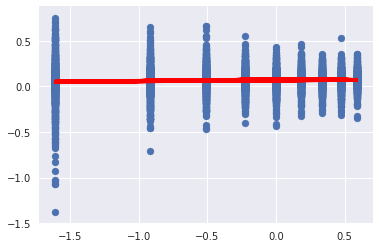

In [34]:
plt.scatter(y = y, x = data_test['E'].values)
plt.plot(data_test['E'].values, y_hat,color='red')
plt.show()

since s = RSS: 

In [35]:
weight_estimate = np.sqrt(np.var(residuals)/(X_E.size -2))

In [36]:
data_test_weighted = data_test.copy()
data_test_weighted['E'] =  data_trans['E']/weight_estimate
data_test_weighted['ES'] = data_trans['ES']/weight_estimate
data_test_weighted['P'] =  data_trans['P']/weight_estimate
data_test_weighted['S'] =  data_trans['S']/weight_estimate
data_test_weighted.describe()

,mu_mass,sigma_mass,volume_fraction,log_k1_bwd,log_k1_fwd,log_k2_bwd,log_k2_fwd,E,ES,P,S
count,7.290000e+03,7.290000e+03,7290.0,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000
mean,3.190000e+01,8.250000e-01,0.0,-0.014628,0.069651,0.067829,-0.014627,-281.470016,-281.470016,-0.000341,-0.000341
std,3.886935e-12,1.090314e-13,0.0,0.005323,0.127339,0.127859,0.005323,1020.708742,1020.708742,1766.701924,1766.701924
min,3.190000e+01,8.250000e-01,0.0,-0.032130,-1.381651,-1.246091,-0.032162,-2422.341734,-2422.341734,-2422.341734,-2422.341734
25%,3.190000e+01,8.250000e-01,0.0,-0.018157,0.024149,0.021275,-0.018157,-768.836261,-768.836261,-1653.508544,-1653.508544
50%,3.190000e+01,8.250000e-01,0.0,-0.014177,0.076650,0.073838,-0.014192,0.000000,0.000000,0.000000,0.000000
75%,3.190000e+01,8.250000e-01,0.0,-0.010010,0.124177,0.121968,-0.010002,506.419499,506.419499,1653.505473,1653.505473
max,3.190000e+01,8.250000e-01,0.0,-0.005235,0.752808,0.992248,-0.005228,884.669212,884.669212,2422.341734,2422.341734


In [37]:
data_test_weighted

,mu_mass,sigma_mass,volume_fraction,log_k1_bwd,log_k1_fwd,log_k2_bwd,log_k2_fwd,E,ES,P,S
10,31.9,0.825,0.0,-0.022026,0.126960,-0.024527,-0.022038,-768.836261,506.419499,1043.245801,2422.341734
19,31.9,0.825,0.0,-0.012882,0.084923,0.125412,-0.012882,506.419499,-768.836261,1043.245801,-1653.508544
41,31.9,0.825,0.0,-0.015864,0.051344,-0.005870,-0.015793,884.669212,-2422.341734,-2086.491601,2422.341734
44,31.9,0.825,0.0,-0.011482,0.107766,0.072462,-0.011524,884.669212,-2422.341734,-1043.245801,1653.505473
104,31.9,0.825,0.0,-0.008684,0.181067,0.136638,-0.008671,884.669212,-2422.341734,-1653.508544,-1043.245801
111,31.9,0.825,0.0,-0.022785,0.060328,0.109535,-0.022793,-768.836261,506.419499,2086.491601,1653.505473
116,31.9,0.825,0.0,-0.011921,0.109228,0.101814,-0.011924,274.409539,-335.850133,1043.245801,-1043.245801
168,31.9,0.825,0.0,-0.017038,0.184670,0.018555,-0.017025,-335.850133,274.409539,2086.491601,-1653.508544
169,31.9,0.825,0.0,-0.015554,0.033975,0.104220,-0.015542,0.000000,0.000000,1653.505473,0.000000
174,31.9,0.825,0.0,-0.015508,0.139953,0.066000,-0.015548,884.669212,-2422.341734,1653.505473,0.000000


In [38]:
reg = LinearRegression()
X = create_regressors(data_test_weighted,['E','ES','P','S'])
reg.fit(X,y)

print(reg.coef_)


[ 0.00000000e+00  1.23872732e-05  6.16595828e-06 -4.49136646e-07
  4.28824781e-06]


#### residuals computed for each feature individually

In [39]:
def estimate_weight(data,covariate):
    
    y = data["log_k1_bwd"]
    #regression only with a certain feature covariate
    reg = LinearRegression()
    X = create_regressors(data,covariate)
    reg.fit(X,y)

    #find the residuals
    y_hat = reg.predict(X)
    residuals = (y-y_hat).values

    #computation of the weight
    weight_estimate = np.sqrt(np.var(residuals)/(X.size -2))
    
    return weight_estimate

In [40]:
covariates = ['E','S','ES','P']
weights = []

for name in covariates:
    weights.append(estimate_weight(data_test,name))

In [41]:
print(weights)

[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]


we obtain the same weight for the different covariates

In [42]:
# count the different type of volume occupation
vfraction = data['volume_fraction'].values
unique = np.unique(vfraction)

In [43]:
Weight = []
for volume in unique:
    w = []
    data = data_trans[data_trans['volume_fraction']==volume]
    for name in covariates:
        w.append(estimate_weight(data_test,name))
    Weight.append(w)
    print(w)

[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]
[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]
[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]
[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]
[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]
[4.407766237576573e-05, 3.349087364213572e-05, 4.4081301639670896e-05, 3.349235536967957e-05]


In [44]:
tab_weights2 = pd.DataFrame(Weight)

tab_weights[0].values[0]

In [45]:
tab_weights2[0].values[0]

4.407766237576573e-05

issue : same weight for all types of concentration

but it is still different for the different coefficient we are trying to estimate:

for y1_forward : 2.4322071957924314e-18

for y1_backward: 1.529293643074293e-18

let's try to do a weigthed regression with these weights:

In [46]:
reg = LinearRegression()

data_test_weighted = data_trans.copy()
data_test_weighted['E'] =  data_trans['E']/1.529293643074293e-18
data_test_weighted['ES'] = data_trans['ES']/1.529293643074293e-18
data_test_weighted['P'] =  data_trans['P']/1.529293643074293e-18
data_test_weighted['S'] =  data_trans['S']/1.529293643074293e-18


D = data_test_weighted[data_test_weighted["volume_fraction"]==0.2]
X = create_regressors(D,covariates)
y = D["log_k1_bwd"]

reg.fit(X,y)

reg.coef_

array([ 0.00000000e+00, -2.49375536e-22, -7.82160536e-21,  5.22121667e-21,
       -7.81857534e-21])

In [47]:
reg.coef_/1.529293643074293e-18

array([ 0.        , -0.00016307, -0.00511452,  0.00341414, -0.00511254])

In [48]:
w = 1#.529293643074293e-18

mod_wls = sm.WLS(y, X, weights=1./(w))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:             log_k1_bwd   R-squared:                      -2.930
Model:                            WLS   Adj. R-squared:                 -2.930
Method:                 Least Squares   F-statistic:                    -7245.
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               1.00
Time:                        18:04:54   Log-Likelihood:                -15234.
No. Observations:               29160   AIC:                         3.048e+04
Df Residuals:                   29156   BIC:                         3.051e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.047e-36   2.77e-38   -146.007      0.0